In [1]:
%matplotlib inline

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
import xgboost as xgb
import pickle

# Default of Credit Card Clients Dataset
## ML prediction of client defaulting next month
### Author: Aleksandar Vladimirov

Abstract: Recently a colleague of mine was rejected a loan(credit card). Until then I've only heard that your ML algorithum might affect people's lives and that got me interested/wondering can we predict the default of a customer and are the algorithms trained on the available dataset always correct.

Table of content:
1. Introduction
2. Importing and reading the data 
3. Data Preprocessing, Exploratory Data Analysis (EDA) and Predictive Modeling Preparation  

4. Predictive models  
    4.1 Decision trees    
    4.2 Random forests   
    4.3 Linear SVM
    4.4 Gaussian SVM
    4.5 Adaboost
    4.6 Test results
    4.7 Further algorith improvement
5. Conclusion
6. References

## 1. Introduction

Credit risk/score or the probability of a client defaulting is quite an interesting topic. It would be interesting to be from the inside of a big consumer credit reporting agency and really see how if a person missed a payment once this affects his/her credit score and potentially their life. Since this is not the case and another big data breach like the one for Equifax hasn't happened with the data made publicly available the UCI Default of Credit Card Clients Dataset will suffice.

My goal is to see if I can predict the default of a client next month and to check if algorithms trained and tested on the available dataset can be absolutely correct (100%). This will be and my goal.

Similar attempts have been made and there are numberous kernels in Kaggle along with this dataset.

## 2. Importing and reading the data

In [3]:
default_data = pd.read_csv("data/UCI_Credit_Card.csv")

Before taking a peak at what we've read, here's the description of the 25 variables from Kaggle:

There are 25 variables:

ID: ID of each client

- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
#Let's take a peek at what we've read.
default_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
#Let's see if we have all the data read into our dataframe.
default_data.shape

(30000, 25)

In [6]:
#Now will check for any missing values.
default_data.isna().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

## 3. Data Preprocessing, Exploratory Data Analysis (EDA) and Predictive Modeling Preparation

### 3.1 Data Preprocessing

After initial look at the table there are several things which I'd like to do:

- set the ID column as index column
- columns "SEX", "EDUCATION", "MARRIAGE" are categories
- all columns should be made with lower-case as per convention and for easier referencing later.
- rename comun "pay_0" to "pay_1" as it seems more logical and I will avoid asking myself later - did I miss a column there?

In [7]:
default_data.set_index('ID', inplace=True)

In [8]:
default_data.columns = map(str.lower, default_data.columns)

In [9]:
default_data.rename(columns={"pay_0":"pay_1", "default.payment.next.month":"dflt_pmt"}, inplace = True)

In [10]:
default_data.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,dflt_pmt
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
#And let's see if we need to change any of the data types.
default_data.dtypes

limit_bal    float64
sex            int64
education      int64
marriage       int64
age            int64
pay_1          int64
pay_2          int64
pay_3          int64
pay_4          int64
pay_5          int64
pay_6          int64
bill_amt1    float64
bill_amt2    float64
bill_amt3    float64
bill_amt4    float64
bill_amt5    float64
bill_amt6    float64
pay_amt1     float64
pay_amt2     float64
pay_amt3     float64
pay_amt4     float64
pay_amt5     float64
pay_amt6     float64
dflt_pmt       int64
dtype: object

In [12]:
default_data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


From the describe above I've noticed a few interesting things:

- pay_* can be "-2" and as it happens from the table below "0". I will leave those as upon looking at the table below it seems to me that "-2" is when you're not at all utilizing any credit amounts and "0" is for when you're paying some of the used amount but not in full. In other kernels it was suggested those are probably mistakes although I disagree;
- there is marital status "0" which I will change to "3" - other, because you're either married, single or other and this seems logical;
- going to change "0" from "education" to "4" (other) and see if types 5 and 6 are a big part of the data.

In [13]:
default_data[["pay_1", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", "bill_amt1", "bill_amt2", "bill_amt3", "bill_amt4", "bill_amt5", "pay_amt1", "pay_amt2", "pay_amt3", "pay_amt4", "dflt_pmt"]].head(30)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,pay_amt1,pay_amt2,pay_amt3,pay_amt4,dflt_pmt
ID,,,,,,,,,,,,,,,,
1,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,689.0,0.0,0.0,1
2,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,0.0,1000.0,1000.0,1000.0,1
3,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,1518.0,1500.0,1000.0,1000.0,0
4,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,2000.0,2019.0,1200.0,1100.0,0
5,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,2000.0,36681.0,10000.0,9000.0,0
6,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,2500.0,1815.0,657.0,1000.0,0
7,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,55000.0,40000.0,38000.0,20239.0,0
8,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,380.0,601.0,0.0,581.0,0
9,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3329.0,0.0,432.0,1000.0,0


In [14]:
#Replace the 0 with 3 in the marriage column.
default_data.marriage = default_data.marriage.astype(str)
default_data.marriage = default_data.marriage.apply(lambda x: x.replace("0", "3"))
default_data.marriage = default_data.marriage.astype('int64')

In [15]:
#Quick check.
default_data.marriage.unique()

array([1, 2, 3], dtype=int64)

In [16]:
#Replace the 0 with 4 in the education column.
default_data.education = default_data.education.astype(str)
default_data.education = default_data.education.apply(lambda x: x.replace("0", "4"))
default_data.education = default_data.education.astype('int64')

In [17]:
#Quick check.
default_data.education.unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [18]:
default_data.groupby("education").size()/ len(default_data)*100

education
1    35.283333
2    46.766667
3    16.390000
4     0.456667
5     0.933333
6     0.170000
dtype: float64

Since the 5 and 6 are really insignificant part of the data I will change those to "other" as well in order to decrease the number of columns if dummies are used later.

In [19]:
default_data.education = default_data.education.astype(str)
default_data.education = default_data.education.apply(lambda x: x.replace("5", "4"))
default_data.education = default_data.education.apply(lambda x: x.replace("6", "4"))
default_data.education = default_data.education.astype('int64')

In [20]:
#Quick check.
default_data.education.unique()

array([2, 1, 3, 4], dtype=int64)

### 3.2 Time for visualising our data and EDA

So let's first see how many defaults next month are there from the 30 k recodrded clients.

In [21]:
default_data.groupby("dflt_pmt").size()/len(default_data)

dflt_pmt
0    0.7788
1    0.2212
dtype: float64

6636 defaults out of 30,000. Or percentagewise below - 22,12% of the customers will default next month.

In [22]:
default_data.groupby("dflt_pmt").size()/len(default_data)

dflt_pmt
0    0.7788
1    0.2212
dtype: float64

Our data is not that imbalanced in order to need oversampling or any additional reworking but will need to use stratification later.

I'm intersted to see the sex, age and education distribution.

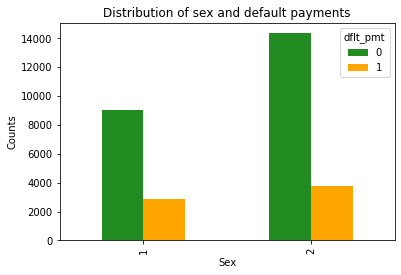

In [23]:
pd.crosstab(default_data["sex"], default_data["dflt_pmt"]).plot(kind="bar", stacked=False, color = ["forestgreen","orange"])

plt.title("Distribution of sex and default payments")
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.show()

In [24]:
default_data[default_data.dflt_pmt == 1].groupby("sex").size()/default_data.groupby("sex").size()

sex
1    0.241672
2    0.207763
dtype: float64

As can be seen on the plot above the 24.2% of male(1) defaulting is higher compared to the same for females(2) - 20.8%.

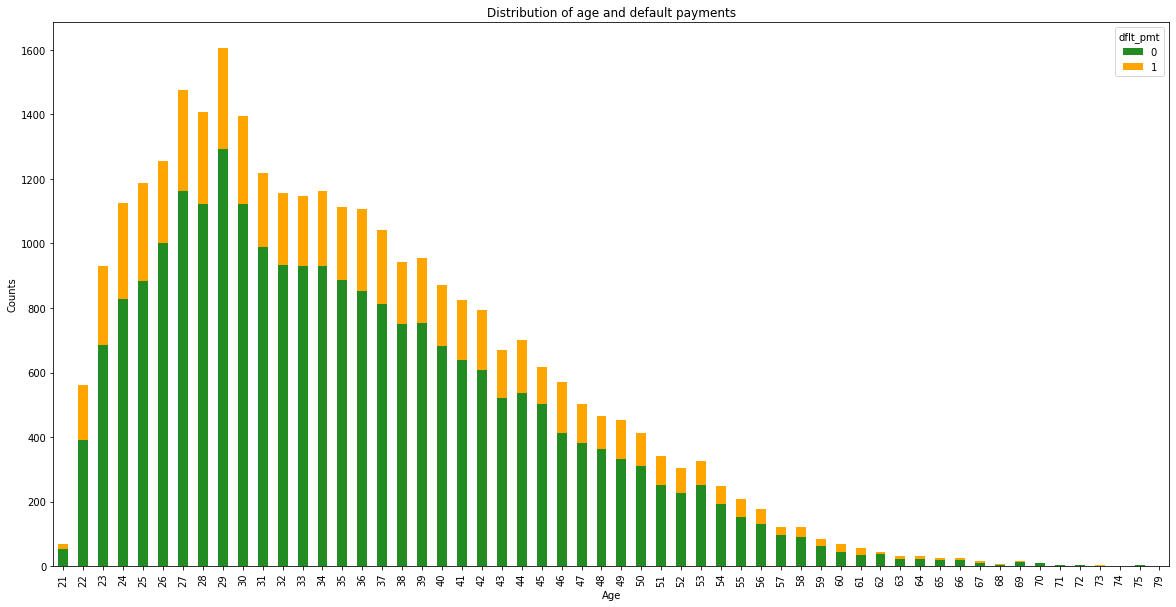

In [25]:
pd.crosstab(default_data["age"], default_data["dflt_pmt"]).plot(kind="bar", stacked=True, figsize =(20,10), color = ["forestgreen","orange"])

plt.title("Distribution of age and default payments")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.show()

In [26]:
default_data.age[default_data.dflt_pmt == 1].describe()

count    6636.000000
mean       35.725738
std         9.693438
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

The most people using credit cards in this dataset are around 30 years old with mean age of 35.48 years (desribe table of the whole DF) against 35.72 - average age of the defaulting users. 

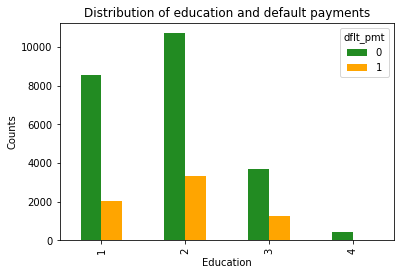

In [27]:
pd.crosstab(default_data["education"], default_data["dflt_pmt"]).plot(kind="bar", stacked=False, color = ["forestgreen","orange"])

plt.title("Distribution of education and default payments")
plt.xlabel("Education")
plt.ylabel("Counts")
plt.show()

In [28]:
default_data[default_data.dflt_pmt == 1].groupby("education").size()/default_data.groupby("education").size()

education
1    0.192348
2    0.237349
3    0.251576
4    0.070513
dtype: float64

The highest degrees (1 being graduate school, 2 - university, 3 - highschool) have the lowest default percentage. (Thanks to Google now I can distinguish between graduate school and university).

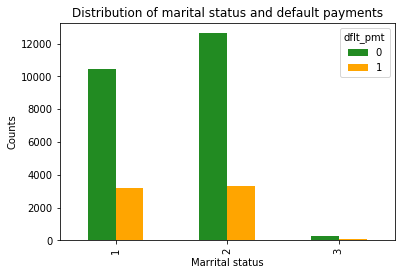

In [29]:
pd.crosstab(default_data["marriage"], default_data["dflt_pmt"]).plot(kind="bar", stacked=False, color = ["forestgreen","orange"])

plt.title("Distribution of marital status and default payments")
plt.xlabel("Marrital status")
plt.ylabel("Counts")
plt.show()

It can be clearly seen that the married customers have lower default rates.

In [30]:
default_data.corr()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,dflt_pmt
limit_bal,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
sex,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
education,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.112593,0.129703,0.122425,0.116531,0.104088,...,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
marriage,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
age,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
pay_1,-0.271214,-0.057643,0.112593,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
pay_2,-0.296382,-0.070771,0.129703,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
pay_3,-0.286123,-0.066096,0.122425,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
pay_4,-0.267460,-0.060173,0.116531,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
pay_5,-0.249411,-0.055064,0.104088,0.034377,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


As we can see the strongest correlation which the default payment(dflt_pmt) has is with columns pay_1 to pay_6 decreasing the correlation in the same order.

### 3.3 Preparing the datasets for the predictive algorithms.

Let's first determine the categorical variables.

In [31]:
#We can save a back-up of the defaul data as well.
bk_up = default_data

In [32]:
default_data = pd.get_dummies(default_data, columns = ["sex","education","marriage","age","pay_1", "pay_2", "pay_3", "pay_4", "pay_5"])

In [33]:
#Now let's check the new shape of the dataset.
default_data.shape

(30000, 134)

We need to divide the dataset into output (target) where the results are and the features in two separate datasets.

In [34]:
default_attributes = default_data.drop("dflt_pmt", axis = 1)
default_labels = default_data["dflt_pmt"]

In [35]:
#Now let's normalize the data and keep the column names.
scaler = MinMaxScaler()
default_attributes = pd.DataFrame(scaler.fit_transform(default_attributes), index=default_attributes.index, columns=default_attributes.columns)

C:\Users\Hegemony\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [36]:
#Check what we did.
default_attributes.head()

,limit_bal,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_-2,pay_5_-1,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8
ID,,,,,,,,,,,,,,,,,,,,,
1,0.010101,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.111111,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.080808,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.040404,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.040404,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Now let's split the data into train and test datasets.
default_attributes_train, default_attributes_test, default_labels_train, default_labels_test = train_test_split(default_attributes, \
                                default_labels, train_size = 0.7, stratify = default_labels)

C:\Users\Hegemony\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


And again I'm going to check each of the new datasets below.

In [38]:
default_attributes_train.shape

(21000, 133)

In [39]:
default_attributes_test.shape

(9000, 133)

In [40]:
default_labels_train.shape

(21000,)

In [41]:
default_labels_test.shape

(9000,)

In [42]:
#A quick check if the stratification in train_test_split a few rows above is ok.
pd.Series(default_labels_train).groupby(default_labels_train).size() / len(default_labels_train)

dflt_pmt
0    0.77881
1    0.22119
Name: dflt_pmt, dtype: float64

Good. The only thing left is to prepare a stratified k_fold for the train data which has already been shuffled with the train_test_split in order to prevent any data leakage. 

In [43]:
skf = StratifiedKFold(n_splits = 5, shuffle = False)
k_fold = list(skf.split(default_attributes_train, default_labels_train))

## 4. Predictive algorithms

For each algorithm I will apply the same steps: Select parameters for gridsearch and perform the fine-tuning training of the gridseach on the k_fold wich was created above, then saving the best estimator in a classifier and showing the f1_scores (the data is unbalanced so f1_score seems more reasonable metric. Since we're talking about credit defaults and banks will be keen to be accurate on the people who are likely to defaul (1 in our dataset - dflt_pmt column) I'm going to take a look at the Recall later in the classificaition reports. During my course I got used to that "format" which I find useful and really easy to understand by a quick glance.

After each training I will copy in "Markdown" the results of the training because the training will not be performed when this notebooks is being reviewed. Will be using Pickle for the already trained algorithms.

Furthermore I see more logincal and easier when comparing results/classification reports etc to compare all the algorithms together, hence I will do it at once after all algorithms have been optimized/trained.

### 4.1 Decision Tree

Let's try to optimize a decision tree for this classification via GridSearchCV.

In [45]:
#params = {
#    "max_depth": [5, 7, 15, 20, 30],
#    "min_samples_leaf": [2, 5, 10, 15, 20, 30],
#    "max_leaf_nodes": [10, 20, 30]
#}
#
#grid_search = GridSearchCV(DecisionTreeClassifier(), params, scoring = "f1",
#                          cv = k_fold)
#%time grid_search.fit(default_attributes_train, default_labels_train)
#
#tree_classifier = grid_search.best_estimator_
#
#print("Decision tree; best score:", grid_search.best_score_)
#print(grid_search.best_params_)

Wall time: 1min 44s
Decision tree; best score: 0.47120944998220704
{'max_depth': 15, 'max_leaf_nodes': 30, 'min_samples_leaf': 2}


Wall time: 1min 44s
Decision tree; best score: 0.47120944998220704
{'max_depth': 15, 'max_leaf_nodes': 30, 'min_samples_leaf': 2}

Since we're at the boundaries for min_samples_leaf and max_leaf_nodes let's try to amend the parameters and check if we're going to increase the score.

In [46]:
#params = {
#    "max_depth": [15],
#    "max_leaf_nodes": [30, 40, 50],
#    "min_samples_leaf": [1, 2]
#    
#}
#
#grid_search = GridSearchCV(DecisionTreeClassifier(), params, scoring = "f1",
#                          cv = k_fold)
#%time grid_search.fit(default_attributes_train, default_labels_train)
#
#tree_classifier = grid_search.best_estimator_
#
#print("Decision tree; best score:", grid_search.best_score_)
#print(grid_search.best_params_)

Wall time: 16.4 s
Decision tree; best score: 0.4732503213667491
{'max_depth': 15, 'max_leaf_nodes': 30, 'min_samples_leaf': 2}


Wall time: 16.4 s
Decision tree; best score: 0.4732503213667491
{'max_depth': 15, 'max_leaf_nodes': 30, 'min_samples_leaf': 2}

The score seems low, but that's due to the imbalance in the data.

In [47]:
#Save the trained model.
#pickle.dump(tree_classifier, open("tree_classifier.p", 'wb'))

### 4.2 RandomForest

In [48]:
#params = {
#    "n_estimators": [50, 100, 200, 300],
#    "max_depth": [20, 50, 100, 150]
#}
#
#grid_search = GridSearchCV(RandomForestClassifier(), params, scoring = "f1",
#                          cv = k_fold)
#%time grid_search.fit(default_attributes_train, default_labels_train)
#
#forest_classifier = grid_search.best_estimator_
#
#print("The best score for Random forest: ", grid_search.best_score_)
#print(grid_search.best_params_)

Wall time: 9min 39s
The best score for Random forest:  0.47057004106602
{'max_depth': 150, 'n_estimators': 300}


Wall time: 9min 39s
The best score for Random forest:  0.47057004106602
{'max_depth': 150, 'n_estimators': 300}

In [49]:
#params = {
#    "n_estimators": [300, 400],
#    "max_depth": [20, 50, 100]
#}
#
#grid_search = GridSearchCV(RandomForestClassifier(), params, scoring = "f1",
#                          cv = k_fold)
#%time grid_search.fit(default_attributes_train, default_labels_train)
#
#forest_classifier = grid_search.best_estimator_
#
#print("The best score for Random forest: ", grid_search.best_score_)
#print(grid_search.best_params_)

Wall time: 7min 53s
The best score for Random forest:  0.47003495111277055
{'max_depth': 100, 'n_estimators': 400}


Wall time: 7min 53s
The best score for Random forest:  0.47003495111277055
{'max_depth': 100, 'n_estimators': 400}

Here I've probably should've increase max_depth, but since there's a tendency for the plants (trees, forests) to overfit and since this is exactly what happened when expecting the classification reports below I"m going to leave it as is. The score seems low, but that's due to the imbalance in the data.

In [50]:
#Save the trained model.
#pickle.dump(forest_classifier, open("forest_classifier.p", 'wb'))

### 4.3 Linear SVM

In [51]:
#params = {
#    "C": [1, 6, 10, 15, 20]
#}
#
grid_search = GridSearchCV(LinearSVC(dual = False), params, scoring = "f1",
#                          cv = k_fold)
#%time grid_search.fit(default_attributes_train, default_labels_train)
#
#linear_SVM_classifier = grid_search.best_estimator_
#
#print("The best score for Linear SVM: ", grid_search.best_score_)
#print(grid_search.best_params_)

Wall time: 50.9 s
The best score for Linear SVM:  0.468170834232026
{'C': 1.5}


Wall time: 50.9 s
The best score for Linear SVM:  0.468170834232026
{'C': 1.5}

We got it the first time, so no more actions required at this time. The score seems low, but that's due to the imbalance in the data.

In [52]:
#Save the trained model.
#pickle.dump(linear_SVM_classifier, open("linear_SVM_classifier.p", 'wb'))

### 4.4 Gaussian SVM

In [53]:
#Let's do PCA on default_attributes_train and let those for the Gaussian SVC.
pca = PCA(n_components = 0.95)
pca.fit(default_attributes_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
default_attributes_PCA = pca.transform(default_attributes_train)

In [55]:
pca.explained_variance_ratio_

array([0.21732311, 0.09757899, 0.09048988, 0.08149911, 0.07012104,
       0.05779632, 0.03609845, 0.03315875, 0.02205546, 0.01931635,
       0.01602857, 0.01349805, 0.01127341, 0.01058397, 0.00887256,
       0.00851261, 0.00820108, 0.00794999, 0.00780732, 0.00761162,
       0.0073838 , 0.00700806, 0.00688784, 0.00663444, 0.00658673,
       0.006547  , 0.00640169, 0.00622555, 0.00618705, 0.0058703 ,
       0.00551774, 0.00545383, 0.00530198, 0.00512789, 0.00488489,
       0.00474827, 0.00443545, 0.00405987, 0.0038817 , 0.00364624,
       0.00356057, 0.00347467, 0.00326825, 0.00318723])

In [56]:
#params = {
#    "C": [1, 10, 15, 30, 60, 100],
#    "gamma": [0.001, 0.01, 0.1, 0.2]
#}
#
#grid_search = GridSearchCV(SVC(), params, scoring = "f1",
#                          cv = k_fold)
#grid_search.fit(default_attributes_PCA, default_labels_train)
#
#gaussian_SVM_classifier = grid_search.best_estimator_
#
#print("The best score for Gaussian SVM: ", grid_search.best_score_)
#print(grid_search.best_params_)

I find the Gaussian SVM pretty unpractical. Even after dimensionality reduction with PCA the fit seems to take a lot of time (let it run for at least an hour x several times). Since time is of the essence and I'm concerned with getting my machine in smoke if I put the "n_jobs = -1" as suggested for speeding the process up I will just try to see if there are other algorithms which will have better scores. Besides the linear SVM has pretty decent score.

![SmokeUrl](https://indivisibletacoma.net/wp-content/uploads/2019/03/Technical-Difficulties-GIF.gif "Smoke")

### 4.5 Adaboost

In [57]:
#param_grid = {
#    "n_estimators": [300, 400],
#    "learning_rate" : [0.1, 1.0, 10]
#}
#
#grid_search = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1)), 
#                        param_grid, scoring = "f1", cv=k_fold)
#%time grid_search = grid_search.fit(default_attributes_train, default_labels_train)
#
#adaboost_classifier = grid_search.best_estimator_
#
#print(grid_search.best_estimator_)
#print(grid_search.best_score_)

Wall time: 5min 48s
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=400, random_state=None)
0.4541785754081107


Wall time: 5min 48s
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=400, random_state=None)
0.4541785754081107

In [80]:
#param_grid = {
#    "n_estimators": [400, 500],
#    "learning_rate" : [1.0, 10]
#}
#
#grid_search = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1)), 
#                        param_grid, scoring = "f1", cv=k_fold)
#%time grid_search = grid_search.fit(default_attributes_train, default_labels_train)
#
#ada_tuned = grid_search.best_estimator_
#
#print("The best score for tuned Adaboost: ", grid_search.best_score_)
#print(grid_search.best_params_)

Wall time: 4min 20s
The best score for tuned Adaboost:  0.4572153888625712
{'learning_rate': 1.0, 'n_estimators': 500}


Wall time: 4min 20s
The best score for tuned Adaboost:  0.4572153888625712
{'learning_rate': 1.0, 'n_estimators': 500}

Lower scores than the other algorithms there's still room for improvement on the n_estimators front will explore this if I have more time at the end.

In [81]:
#Save the trained model.
#pickle.dump(ada_tuned, open("ada_tuned.p", 'wb'))

### 4.6 Testing results

In [60]:
tree_classifier_loaded = pickle.load(open("tree_classifier.p", "rb"))
forest_classifier_loaded = pickle.load(open("forest_classifier.p", "rb"))
linear_SVM_classifier_loaded = pickle.load(open("linear_SVM_classifier.p", "rb"))
ada_tuned_loaded = pickle.load(open("ada_tuned.p", "rb"))

In [177]:
tree_classifier_score = f1_score(default_labels_test, tree_classifier_loaded.predict(default_attributes_test))
forest_classifier_score = f1_score(default_labels_test, forest_classifier_loaded.predict(default_attributes_test))
linear_svm_classifier_score = f1_score(default_labels_test, linear_SVM_classifier_loaded.predict(default_attributes_test))
ada_tuned_score = f1_score(default_labels_test, ada_tuned_loaded.predict(default_attributes_test))

print("Testing results:")
print("Decision tree:", tree_classifier_score)
print("Random forest:", forest_classifier_score)
print("Linear SVM:", linear_svm_classifier_score)
print("AdaBoost :", ada_tuned_score)

Testing results:
Decision tree: 0.4754571703561117
Random forest: 0.471967057332911
Linear SVM: 0.4639107611548557
AdaBoost : 0.4540039708802118


Decision trees have the highest f1_score, buts since I've mentioned that we're interested in the defaulting people let's check how is the Recall under each algorithm.

In [179]:
print("Decision tree")
print(classification_report(default_labels_train, tree_classifier_loaded.predict(default_attributes_train)))
print(classification_report(default_labels_test, tree_classifier_loaded.predict(default_attributes_test)))

Decision tree
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16355
           1       0.68      0.38      0.49      4645

   micro avg       0.82      0.82      0.82     21000
   macro avg       0.76      0.66      0.69     21000
weighted avg       0.81      0.82      0.80     21000

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.37      0.48      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [180]:
print("Random forest")
print(classification_report(default_labels_train, forest_classifier_loaded.predict(default_attributes_train)))
print(classification_report(default_labels_test, forest_classifier_loaded.predict(default_attributes_test)))

Random forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16355
           1       1.00      1.00      1.00      4645

   micro avg       1.00      1.00      1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.37      0.47      1991

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.81      0.80      9000



In [181]:
print("Linear SVM")
print(classification_report(default_labels_train, linear_SVM_classifier_loaded.predict(default_attributes_train)))
print(classification_report(default_labels_test, linear_SVM_classifier_loaded.predict(default_attributes_test)))

Linear SVM
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16355
           1       0.69      0.36      0.47      4645

   micro avg       0.82      0.82      0.82     21000
   macro avg       0.76      0.66      0.68     21000
weighted avg       0.81      0.82      0.80     21000

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.46      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [182]:
print("Adaboost")
print(classification_report(default_labels_train, ada_tuned_loaded.predict(default_attributes_train)))
print(classification_report(default_labels_test, ada_tuned_loaded.predict(default_attributes_test)))

Adaboost
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16355
           1       0.69      0.36      0.47      4645

   micro avg       0.82      0.82      0.82     21000
   macro avg       0.77      0.66      0.68     21000
weighted avg       0.81      0.82      0.80     21000

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.34      0.45      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In our case of predicting if a loan would be default — It would be better to have a high Recall as the banks don’t want to lose money and would be a good idea to alarm the bank even if there is a slight doubt about defaulter. 
Low precision in this case might be okay

So what I'm going to do next is take the decision trees as the best scoring (and fastest) algorithm and try to improve it.

### 4.7 Further algorith improvement

It's good we kept a back-up of the dataframe - "bk_up". Now we're going to oversample it since the cases of the default in our initial dataset are imbalanced so not much to train on => hence our lower Recall scores.

In [131]:
bk_up_os = pd.get_dummies(bk_up, columns = ["sex","education","marriage","age","pay_1", "pay_2", "pay_3", "pay_4", "pay_5"])

Decision trees can handle categorical features, however since I plan to score this algorithm on the original data and let's keep the dimentions the same.

In [132]:
class_0_counted, class_1_counted = bk_up_os.dflt_pmt.value_counts()
bk_class_0 = bk_up_os[bk_up_os['dflt_pmt'] == 0]
bk_class_1 = bk_up_os[bk_up_os['dflt_pmt'] == 1]

overs_class_1 = bk_class_1.sample(class_0_counted, replace = True)

oversampled_df = pd.concat([bk_class_0, overs_class_1], axis = 0)

In [183]:
#Check the oversampled distribution.
print(oversampled_df.dflt_pmt.value_counts())

1    23364
0    23364
Name: dflt_pmt, dtype: int64


In [134]:
#Let's check the shape of the oversampled dataset. Then I'm going to repeat all the steps under point 3 for the data preprocessing.
oversampled_df.shape

(46728, 134)

In [184]:
#Divide into attributes and labels.
oversampled_df_attributes = oversampled_df.drop("dflt_pmt", axis = 1)
oversampled_df_labels = oversampled_df["dflt_pmt"]

In [185]:
#Scale and keep the column names when using Minmaxscaler.
oversampled_df_attributes = pd.DataFrame(scaler.fit_transform(oversampled_df_attributes), index=oversampled_df_attributes.index, columns=oversampled_df_attributes.columns)

C:\Users\Hegemony\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [137]:
#Check what we did.
oversampled_df_attributes.head()

,limit_bal,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_-2,pay_5_-1,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8
ID,,,,,,,,,,,,,,,,,,,,,
3,0.080808,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.040404,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.040404,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.040404,0.2,0.203506,0.120381,0.117974,0.178407,0.100102,0.276367,0.002862,0.001078,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.494949,0.2,0.472126,0.457242,0.330672,0.671310,0.559578,0.625196,0.062961,0.023749,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
#Split into train/test data.
oversampled_df_attributes_train, oversampled_df_attributes_test, oversampled_df_labels_train, oversampled_df_labels_test = train_test_split(oversampled_df_attributes, \
                                oversampled_df_labels, train_size = 0.7, stratify = oversampled_df_labels)

C:\Users\Hegemony\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [187]:
#A quick check if the stratification in train_test_split a few rows above is ok.
pd.Series(oversampled_df_labels_train).groupby(oversampled_df_labels_train).size() / len(oversampled_df_labels_train)

dflt_pmt
0    0.500015
1    0.499985
Name: dflt_pmt, dtype: float64

In [188]:
#Create new k_fold for the oversampled data.
oversampled_k_fold = list(skf.split(oversampled_df_attributes_train, oversampled_df_labels_train))

So now I plan to run gridsearchcv for decision trees and then apply some prunning to decrease the overfitting.

In [151]:
#params = {
#    "max_depth": [5, 7, 15, 20, 30],
#    "min_samples_leaf": [2, 5, 10, 15, 20],
#    "max_leaf_nodes": [20, 30, 40, 50]
#}
#
#grid_search = GridSearchCV(DecisionTreeClassifier(), params, scoring = "f1",
#                          cv = oversampled_k_fold)
#%time grid_search.fit(oversampled_df_attributes_train, oversampled_df_labels_train)
#
#oversampled_tree_classifier = grid_search.best_estimator_
#
#print("Decision tree - oversampled; best score:", grid_search.best_score_)
#print(grid_search.best_params_)

Wall time: 3min 21s
Decision tree - oversampled; best score: 0.694214223916498
{'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_leaf': 15}


Wall time: 3min 21s
Decision tree - oversampled; best score: 0.694214223916498
{'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_leaf': 15}

Let's try again with more max_leaf_nodes.

In [163]:
#params = {
#    "max_depth": [20],
#    "min_samples_leaf": [15],
#    "max_leaf_nodes": [50, 100, 200, 300, 400]
#}
#
#grid_search = GridSearchCV(DecisionTreeClassifier(), params, scoring = "f1",
#                          cv = oversampled_k_fold)
#%time grid_search.fit(oversampled_df_attributes_train, oversampled_df_labels_train)
#
#oversampled_tree_classifier = grid_search.best_estimator_
#
#print("Decision tree - oversampled; best score:", grid_search.best_score_)
#print(grid_search.best_params_)

Wall time: 15.2 s
Decision tree - oversampled; best score: 0.7494342966795945
{'max_depth': 20, 'max_leaf_nodes': 400, 'min_samples_leaf': 15}


Wall time: 15.2 s
Decision tree - oversampled; best score: 0.7494342966795945
{'max_depth': 20, 'max_leaf_nodes': 400, 'min_samples_leaf': 15}

In [170]:
#Save the trained model.
#pickle.dump(oversampled_tree_classifier, open("oversampled_tree_classifier.p", 'wb'))

In [171]:
oversampled_tree_classifier_loaded = pickle.load(open("oversampled_tree_classifier.p", "rb"))

In [197]:
print("Tuned Decision Trees - Oversampled")
print(classification_report(oversampled_df_labels_train, oversampled_tree_classifier_loaded.predict(oversampled_df_attributes_train)))
print(classification_report(oversampled_df_labels_test, oversampled_tree_classifier_loaded.predict(oversampled_df_attributes_test)))

Tuned Decision Trees - Oversampled
              precision    recall  f1-score   support

           0       0.81      0.75      0.78     16355
           1       0.76      0.83      0.79     16354

   micro avg       0.79      0.79      0.79     32709
   macro avg       0.79      0.79      0.79     32709
weighted avg       0.79      0.79      0.79     32709

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      7009
           1       0.76      0.82      0.79      7010

   micro avg       0.78      0.78      0.78     14019
   macro avg       0.78      0.78      0.78     14019
weighted avg       0.78      0.78      0.78     14019



In [190]:
print("Tuned Decision Trees - original train/test data")
print(classification_report(default_labels_train, oversampled_tree_classifier_loaded.predict(default_attributes_train)))
print(classification_report(default_labels_test, oversampled_tree_classifier_loaded.predict(default_attributes_test)))

Tuned Decision Trees - original train/test data
              precision    recall  f1-score   support

           0       0.93      0.74      0.83     16355
           1       0.47      0.79      0.59      4645

   micro avg       0.76      0.76      0.76     21000
   macro avg       0.70      0.77      0.71     21000
weighted avg       0.83      0.76      0.77     21000

              precision    recall  f1-score   support

           0       0.93      0.74      0.83      7009
           1       0.47      0.80      0.59      1991

   micro avg       0.76      0.76      0.76      9000
   macro avg       0.70      0.77      0.71      9000
weighted avg       0.83      0.76      0.78      9000



Once we've ovesamplified the results increased significantly on the new oversamplified training/test datasets and on the original. The increase is dramatic in the Recall metric which was the desired effect but the overall f1-score on the original training/test data has increased substantially.

### 5. Conclusion

We've managed to train optimize several classification alrogirthms which we've then compared. Among them we've chosen the best scoring one and further optimized it by oversampling the data further parameter tuning.
To answer our initial questions - yes, we can predict the default of a customer to a certain extent given the data which we had, but it can't be predicted with 100% since the data is not enough and the propensity of the lenders to avoid risk (more likely to concentrate on identifying potential defaulters than non-defaulters).

### 6. References

1. For Pickle - https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
2. Numerous articles from datascience.stackexchange.com, medium.com and of course github, stackoverflow and materials from Softuni Machine Learning 2019 course.